In [60]:
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = 'animales'

# Lista para almacenar las imágenes cargadas
image_list = []

# Lista para almacenar las categorias por numeros para que la maquina pueda reconocerlos
image_diferenciada = []

# Recorre todos los archivos de la carpeta
for filename in os.listdir(folder_path):

    if 'perro' in filename:
      image_diferenciada.append(0)
    elif 'persona' in filename:
      image_diferenciada.append(1)
    elif 'hipopotamo' in filename:
      image_diferenciada.append(2)

    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename) # fucion ruta de la carpeta de las imagenes + el recorrido activo del for filename activamente
        img = Image.open(img_path)
        img = img.resize((224, 224))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list.append(img_array)
        print(f'{filename} | nomralizacion y redimension {np.array(img).shape}')
print('')
print(f'Lista categorizada => {image_diferenciada}')
print(f"Tamaño de image_list: {len(image_list)}")
print(f"Tamaño de image_diferenciada: {len(image_diferenciada)}")


hipopotamo (2).jpg | nomralizacion y redimension (224, 224, 3)
hipopotamo.jpg | nomralizacion y redimension (224, 224, 3)
perro0.jpg | nomralizacion y redimension (224, 224, 3)
perro1.jpg | nomralizacion y redimension (224, 224, 3)
perro213.jpg | nomralizacion y redimension (224, 224, 3)
perro323.jpg | nomralizacion y redimension (224, 224, 3)
perro34.jpg | nomralizacion y redimension (224, 224, 3)
perro4.jpg | nomralizacion y redimension (224, 224, 3)
persona.jpg | nomralizacion y redimension (224, 224, 3)
persona2.jpg | nomralizacion y redimension (224, 224, 3)

Lista categorizada => [2, 2, 0, 0, 0, 0, 0, 0, 1, 1]
Tamaño de image_list: 10
Tamaño de image_diferenciada: 10


In [61]:
from sklearn.model_selection import train_test_split
# test_size=0.3: Indica que el 30% de los datos se utilizarán como conjunto de prueba, y el 70% restante como conjunto de entrenamiento.

# random_state=42: Fija la semilla del generador aleatorio para que la división sea reproducible. El número 42 es arbitrario.

X_train, X_test, y_train, y_test = train_test_split(image_list, image_diferenciada, test_size=0.3, random_state=42, stratify=image_diferenciada)

In [62]:
import keras
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Flatten # type: ignore

#Se establece una semilla para evitar distintos resultados
keras.utils.set_random_seed(812)
#Se establece un modelo neuronal
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))  # Aplanar la imagen
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax')) #3 es el numero de clases

c:\Users\mrpic\Escritorio\Reconocimiento_de_imagenes_Red_Neuronal_Multiclase\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [63]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
#Verificamos la estructura de salida esperada para entrenamiento
y_train

[2, 0, 0, 1, 0, 0, 2]

In [65]:
#Verificamos shape de imagenes
import numpy as np

for i, image in enumerate(X_train):
    print(f"Shape of image {i}: {np.array(image).shape}")

Shape of image 0: (224, 224, 3)
Shape of image 1: (224, 224, 3)
Shape of image 2: (224, 224, 3)
Shape of image 3: (224, 224, 3)
Shape of image 4: (224, 224, 3)
Shape of image 5: (224, 224, 3)
Shape of image 6: (224, 224, 3)


In [66]:
#Cambiamos la forma
X_train = np.array(X_train)
y_train = np.array(y_train)

In [67]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [68]:
X_train.shape

(7, 224, 224, 3)

In [69]:
#Verificamos el cambio
y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [70]:
y_train.shape

(7, 3)

In [71]:
# Ajustamos("Entrenamos") el modelo al conjunto de datos cada que se ejecuta este; el modelo nos devulve el accuracy mas preciso; La pérdida (loss) es una medida ve que tan mal está el modelo en esa época. Un valor de 1.1341 indica cuán lejos está el modelo de las predicciones correctas, basándose en la función de pérdida que estás utilizando (en este caso, categorical_crossentropy).

%time model.fit(X_train,y_train,epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step - accuracy: 0.1429 - loss: 1.3627
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.5714 - loss: 80.0743
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.2857 - loss: 56.9668
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5714 - loss: 37.2434
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7143 - loss: 22.5048
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.2857 - loss: 22.5708
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7143 - loss: 10.0160
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7143 - loss: 9.1672
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7143 - loss: 3.0977
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.5714 - loss: 1.7414
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.4286 - loss: 5.2437
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.857

In [72]:
%time y_train

CPU times: total: 0 ns
Wall time: 0 ns


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [73]:
import numpy as np

# Investigate the shapes of elements within X_test
for i, item in enumerate(X_test):
    print(f"Shape of item {i}: {np.array(item).shape}")

# Option 1: Pad images with fewer channels (if applicable)
target_channels = 3  # Set the desired number of channels
X_test_padded = []
for item in X_test:
    item_array = np.array(item)
    if item_array.shape[-1] < target_channels:
        padding_needed = target_channels - item_array.shape[-1]
        padding = [(0, 0)] * (item_array.ndim - 1) + [(0, padding_needed)]
        item_padded = np.pad(item_array, padding, mode='constant')
        X_test_padded.append(item_padded)
    else:
        X_test_padded.append(item_array)

X_test = np.array(X_test_padded)
y_test = np.array(y_test)


Shape of item 0: (224, 224, 3)
Shape of item 1: (224, 224, 3)
Shape of item 2: (224, 224, 3)


In [74]:
if len(y_test.shape) == 0:
    y_test = y_test.reshape(1,)

In [75]:
print(y_test.shape)
print(X_test.shape)

(3,)
(3, 224, 224, 3)


In [76]:
# Verificamos su forma
y_test

array([1, 0, 0])

In [77]:
# Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(X_test) # Esto genera una salida predicha

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [78]:
#Revisamos el resultado
y_pred

array([[8.9057952e-01, 3.0717239e-02, 7.8703277e-02],
       [6.7915045e-07, 5.9277988e-03, 9.9407142e-01],
       [9.9999976e-01, 2.5909893e-07, 1.4954279e-11]], dtype=float32)

In [79]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [80]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score


y_pred = np.argmax(y_pred, axis=1)
# Accuracy
# Métricas de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Calculamos precision, recall y f1 para cada clase
precision = precision_score(y_test, y_pred, average=None)
precision_avg = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average=None)
recall_avg = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average=None)
f1_avg = f1_score(y_test, y_pred, average="macro")
print(f"Exactitud: {accuracy}")
print(f"Precisión por clase: {precision} -> {precision_avg}")
print(f"Sensibilidad por clase: {recall} -> {recall_avg}")
print(f"F1 Score por clase: {f1} -> {f1_avg}")

Exactitud: 0.3333333333333333
Precisión por clase: [0.5 0.  0. ] -> 0.16666666666666666
Sensibilidad por clase: [0.5 0.  0. ] -> 0.16666666666666666
F1 Score por clase: [0.5 0.  0. ] -> 0.16666666666666666


c:\Users\mrpic\Escritorio\Reconocimiento_de_imagenes_Red_Neuronal_Multiclase\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mrpic\Escritorio\Reconocimiento_de_imagenes_Red_Neuronal_Multiclase\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mrpic\Escritorio\Reconocimiento_de_imagenes_Red_Neuronal_Multiclase\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use

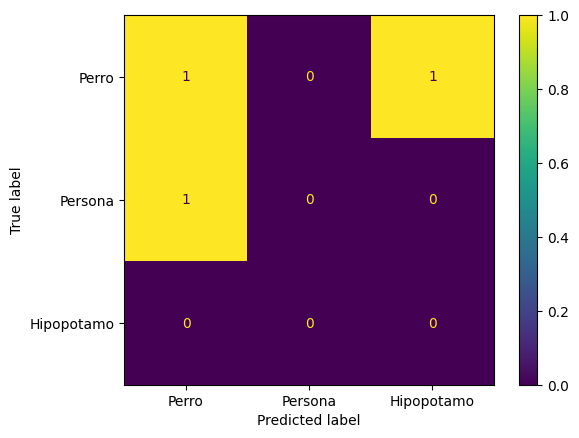

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.display_labels = ['Perro','Persona','Hipopotamo']
disp.plot()

In [82]:
y_test

array([1, 0, 0])

In [83]:
y_pred

array([0, 2, 0], dtype=int64)

In [84]:
X_test[2]

array([[[0.21960784, 0.29803922, 0.1372549 ],
        [0.21960784, 0.30588235, 0.13333333],
        [0.21960784, 0.3254902 , 0.1254902 ],
        ...,
        [0.98823529, 0.97647059, 0.84705882],
        [0.96470588, 0.96078431, 0.78431373],
        [0.96078431, 0.96078431, 0.76078431]],

       [[0.12941176, 0.20784314, 0.02745098],
        [0.11764706, 0.20784314, 0.01568627],
        [0.10588235, 0.21176471, 0.00392157],
        ...,
        [0.98039216, 0.97254902, 0.82352941],
        [0.98039216, 0.97254902, 0.79607843],
        [0.96862745, 0.96862745, 0.77647059]],

       [[0.1372549 , 0.22352941, 0.01176471],
        [0.1254902 , 0.21960784, 0.00784314],
        [0.09803922, 0.20392157, 0.        ],
        ...,
        [0.96078431, 0.96078431, 0.77254902],
        [0.98431373, 0.98039216, 0.8       ],
        [0.98431373, 0.98039216, 0.80784314]],

       ...,

       [[0.48235294, 0.60392157, 0.26666667],
        [0.4627451 , 0.57647059, 0.24313725],
        [0.4745098 , 0

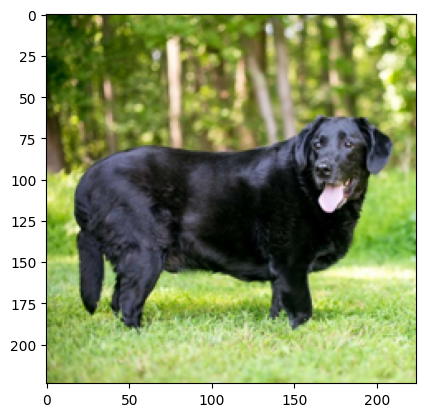

In [85]:
import matplotlib.pyplot as plt
img_array = (X_test[2] * 255).astype(np.uint8)  # escala de 0-255 y conversion a 8-bit integer
img = Image.fromarray(img_array)
plt.imshow(img)

In [88]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score 
from tkinter import filedialog
from PIL import Image

# Abrir cuadro de diálogo para seleccionar múltiples imágenes
rutas_imagenes = filedialog.askopenfilenames(
    title="Seleccionar imágenes",
    filetypes=[("Imágenes", "*.png *.jpg")],
    initialdir="/"
)

print(f"Has seleccionado {len(rutas_imagenes)} imágenes")

# Definir etiquetas verdaderas (y_test) para las imágenes seleccionadas
# Aquí debes conocer cuál es la etiqueta verdadera para cada imagen que seleccionas
# Puedes ajustarlo según los nombres de los archivos o basarte en algún otro criterio
y_test = []
for ruta in rutas_imagenes:
    if 'perro' in ruta:
        y_test.append(0)
    elif 'persona' in ruta:
        y_test.append(1)
    elif 'hipopotamo' in ruta:
        y_test.append(2)

# Procesar y predecir para cada imagen seleccionada
X_test = []
for ruta_imagen in rutas_imagenes:
    img = Image.open(ruta_imagen)
    img = img.resize((224, 224))  # Redimensionar la imagen
    img_array = np.array(img) / 255.0  # Convertir la imagen a un array numpy y normalizar
    X_test.append(img_array)

X_test = np.array(X_test)  # Convertir la lista de imágenes en un array numpy

# Hacer predicciones para el lote de imágenes seleccionadas
predicciones = model.predict(X_test)
y_pred = np.argmax(predicciones, axis=1)  # Obtener la clase con mayor probabilidad para cada imagen

# Mostrar las predicciones
clases = ['perro', 'persona', 'hipopotamo']
for i, pred in enumerate(y_pred):
    print(f"Predicción para imagen {i+1}: {clases[pred]}")

# Calcular métricas
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro')}")


Has seleccionado 3 imágenes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicción para imagen 1: perro
Predicción para imagen 2: perro
Predicción para imagen 3: perro
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
